In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [5]:
df_pe = pd.read_csv("/content/drive/MyDrive/오답률.csv")
df_rt = pd.read_csv("/content/drive/MyDrive/반응속도.csv")
df_rt = df_rt.drop(24)
df_rt = df_rt.drop(['participant_no'], axis = 1)
df_pe = df_pe.drop(['participant_no'], axis = 1)
df_rt.three_color = pd.to_numeric(df_rt.three_color)
df_pe2 = pd.DataFrame(np.repeat(df_pe.values,3,axis=0))
df_pe2.columns = df_pe.columns
df_rt2 = pd.DataFrame(np.repeat(df_rt.values,3,axis=0))
df_rt2.columns = df_rt.columns
df_rt2['average'] = df_rt2.mean(axis = 1)
df_pe2['average'] = df_pe2.mean(axis = 1)
df_rt2['blackaverage'] = (df_rt2['two_black'] + df_rt2['three_black'] 
                          + df_rt2['four_black'] + df_rt2['five_black'] 
                          + df_rt2['six_black']) / 5
df_rt2['coloraverage'] = (df_rt2['two_color'] + df_rt2['three_color'] 
                          + df_rt2['four_color'] + df_rt2['five_color'] 
                          + df_rt2['six_color']) / 5
df_pe2['blackaverage'] = (df_pe2['two_black'] + df_pe2['three_black'] 
                          + df_pe2['four_black'] + df_pe2['five_black'] 
                          + df_pe2['six_black']) / 5
df_pe2['coloraverage'] = (df_pe2['two_color'] + df_pe2['three_color'] 
                          + df_pe2['four_color'] + df_pe2['five_color'] 
                          + df_pe2['six_color']) / 5
print(df_pe2)
print(df_rt2)

    two_black  three_black  four_black  ...    average  blackaverage  coloraverage
0   28.571429         37.5   42.857143  ...  39.642857     37.500000     41.785714
1   28.571429         37.5   42.857143  ...  39.642857     37.500000     41.785714
2   28.571429         37.5   42.857143  ...  39.642857     37.500000     41.785714
3   14.285714         12.5   71.428571  ...  22.857143     27.500000     18.214286
4   14.285714         12.5   71.428571  ...  22.857143     27.500000     18.214286
..        ...          ...         ...  ...        ...           ...           ...
67   0.000000          0.0   12.500000  ...   2.678571      5.357143      0.000000
68   0.000000          0.0   12.500000  ...   2.678571      5.357143      0.000000
69  12.500000          0.0   12.500000  ...  12.142857      7.857143     16.428571
70  12.500000          0.0   12.500000  ...  12.142857      7.857143     16.428571
71  12.500000          0.0   12.500000  ...  12.142857      7.857143     16.428571

[72

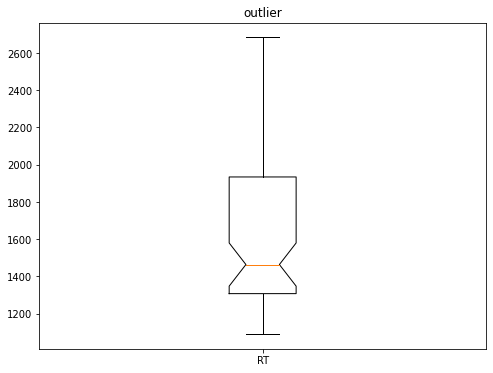

In [ ]:
plt.figure(figsize = (8, 6)) 
plt.boxplot((df_rt2.average), notch = True, sym = "o", 
            labels = ["RT"])
plt.title("outlier")
plt.show()

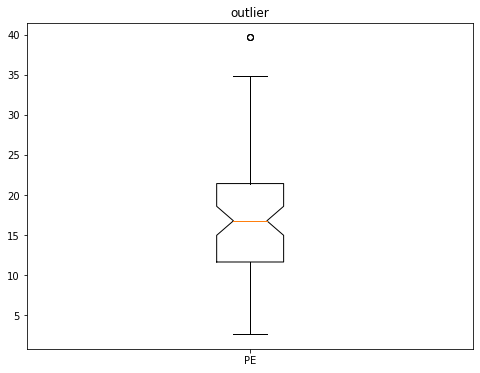

In [ ]:
plt.figure(figsize = (8, 6)) 
plt.boxplot((df_pe2.average), notch = True, sym = "o", 
            labels = ["PE"])
plt.title("outlier")
plt.show()

In [7]:
Q1 = df_pe2.average.quantile(0.25)
Q3 = df_pe2.average.quantile(0.75)
IQR = Q3 - Q1
print(df_pe2.query(f"(average < {Q1} - 1.5 * {IQR}) or (average > {Q3} + 1.5 * {IQR})"))
df_pe3 = df_pe2.drop([0, 1, 2])
df_rt3 = df_rt2.drop([0, 1, 2])
print(df_pe3)
print(df_rt3)

   two_black  three_black  four_black  ...    average  blackaverage  coloraverage
0  28.571429         37.5   42.857143  ...  39.642857          37.5     41.785714
1  28.571429         37.5   42.857143  ...  39.642857          37.5     41.785714
2  28.571429         37.5   42.857143  ...  39.642857          37.5     41.785714

[3 rows x 13 columns]
    two_black  three_black  four_black  ...    average  blackaverage  coloraverage
3   14.285714         12.5   71.428571  ...  22.857143     27.500000     18.214286
4   14.285714         12.5   71.428571  ...  22.857143     27.500000     18.214286
5   14.285714         12.5   71.428571  ...  22.857143     27.500000     18.214286
6   14.285714         12.5   14.285714  ...  15.178571     13.928571     16.428571
7   14.285714         12.5   14.285714  ...  15.178571     13.928571     16.428571
..        ...          ...         ...  ...        ...           ...           ...
67   0.000000          0.0   12.500000  ...   2.678571      5.357143

In [8]:
df_rt3.describe()

,two_black,three_black,four_black,five_black,six_black,two_color,three_color,four_color,five_color,six_color,average,blackaverage,coloraverage
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1371.750776,1412.961956,1589.291149,1681.008540,1597.475155,1362.769410,1665.840062,1691.920031,1683.060559,1815.562888,1587.164053,1530.497516,1643.830590
std,376.997904,338.624772,554.907395,716.007454,576.565801,428.877076,550.954649,613.435448,466.356360,651.413703,424.556332,431.291082,446.403794
min,776.857143,787.285714,879.714286,919.571429,822.250000,855.285714,887.142857,783.714286,1010.285714,979.428571,1090.642857,958.157143,1047.735714
25%,1112.875000,1202.428571,1186.000000,1178.714286,1170.285714,988.428571,1275.714286,1279.000000,1236.142857,1385.857143,1271.946428,1142.171429,1355.475000
50%,1345.857143,1393.000000,1335.285714,1377.714286,1449.625000,1285.875000,1471.857143,1576.875000,1608.428571,1600.125000,1462.267857,1416.635714,1509.800000
75%,1571.428571,1594.375000,2034.250000,2201.250000,1986.000000,1572.500000,2157.625000,1971.500000,1960.625000,2488.571429,1892.208929,1826.082143,1958.335714
max,2351.285714,2084.625000,2798.500000,3492.857143,3188.875000,2524.142857,2629.428571,3548.571429,2983.000000,3264.714286,2683.676786,2493.414286,2873.939286


In [9]:
df_pe3.describe()

,two_black,three_black,four_black,five_black,six_black,two_color,three_color,four_color,five_color,six_color,average,blackaverage,coloraverage
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,14.596273,9.083851,22.826087,22.593168,21.739130,9.394410,9.782609,15.993789,14.829193,20.108696,16.094720,18.167702,14.021739
std,14.170215,10.500936,16.807015,16.720176,14.772930,14.245124,10.392618,16.284289,14.286713,13.252600,7.756041,9.343091,9.201022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.678571,5.357143,0.000000
25%,0.000000,0.000000,12.500000,12.500000,12.500000,0.000000,0.000000,0.000000,0.000000,12.500000,10.714286,7.857143,5.000000
50%,14.285714,12.500000,14.285714,25.000000,25.000000,0.000000,12.500000,12.500000,14.285714,25.000000,15.714286,18.214286,13.214286
75%,25.000000,14.285714,28.571429,28.571429,28.571429,14.285714,14.285714,25.000000,25.000000,28.571429,21.071429,26.428571,18.928571
max,57.142857,37.500000,71.428571,57.142857,57.142857,57.142857,37.500000,62.500000,50.000000,42.857143,34.821429,33.214286,37.857143


In [10]:
print(st.ttest_rel(df_pe3.two_black, df_pe3.two_color))
print(st.ttest_rel(df_pe3.three_black, df_pe3.three_color))
print(st.ttest_rel(df_pe3.four_black, df_pe3.four_color))
print(st.ttest_rel(df_pe3.five_black, df_pe3.five_color))
print(st.ttest_rel(df_pe3.six_black, df_pe3.six_color))
print(st.ttest_rel(df_pe3.blackaverage, df_pe3.coloraverage))
# 정확도. 양수인 경우 흑백이 더 많이 틀렸고, 음수인 경우 컬러가 더 많이 틀렸다고 보면 됨.

Ttest_relResult(statistic=2.164871145515249, pvalue=0.033910686413384496)
Ttest_relResult(statistic=-0.43501647359126683, pvalue=0.6649280131954327)
Ttest_relResult(statistic=3.06365752569962, pvalue=0.003132636882703904)
Ttest_relResult(statistic=3.742174723104968, pvalue=0.0003772220379010596)
Ttest_relResult(statistic=0.7068122196220202, pvalue=0.48209826588166493)
Ttest_relResult(statistic=3.3887740192955276, pvalue=0.0011717502168767009)


In [15]:
np.corrcoef(df_rt3.blackaverage, df_rt3.coloraverage)

array([[1.        , 0.87182261],
       [0.87182261, 1.        ]])

In [12]:
print(st.ttest_rel(df_rt3.two_black, df_rt3.two_color))
print(st.ttest_rel(df_rt3.three_black, df_rt3.three_color))
print(st.ttest_rel(df_rt3.four_black, df_rt3.four_color))
print(st.ttest_rel(df_rt3.five_black, df_rt3.five_color))
print(st.ttest_rel(df_rt3.six_black, df_rt3.six_color))
print(st.ttest_rel(df_rt3.blackaverage, df_rt3.coloraverage))
# 반응 속도. 양수인 경우 흑백의 반응 속도가 더 느렸고, 음수의 경우 컬러의 반응 속도가 더 느렸음.

Ttest_relResult(statistic=0.1810585765039715, pvalue=0.8568601758906664)
Ttest_relResult(statistic=-4.928257095849605, pvalue=5.603211143485542e-06)
Ttest_relResult(statistic=-1.7870717339083395, pvalue=0.07838255841647937)
Ttest_relResult(statistic=-0.03304363662120171, pvalue=0.9737365910148312)
Ttest_relResult(statistic=-5.443089355822235, pvalue=7.756513775226526e-07)
Ttest_relResult(statistic=-4.227745097979959, pvalue=7.208686257048824e-05)


In [ ]:
np.average(df_rt3.two_color)

1362.7694098695652

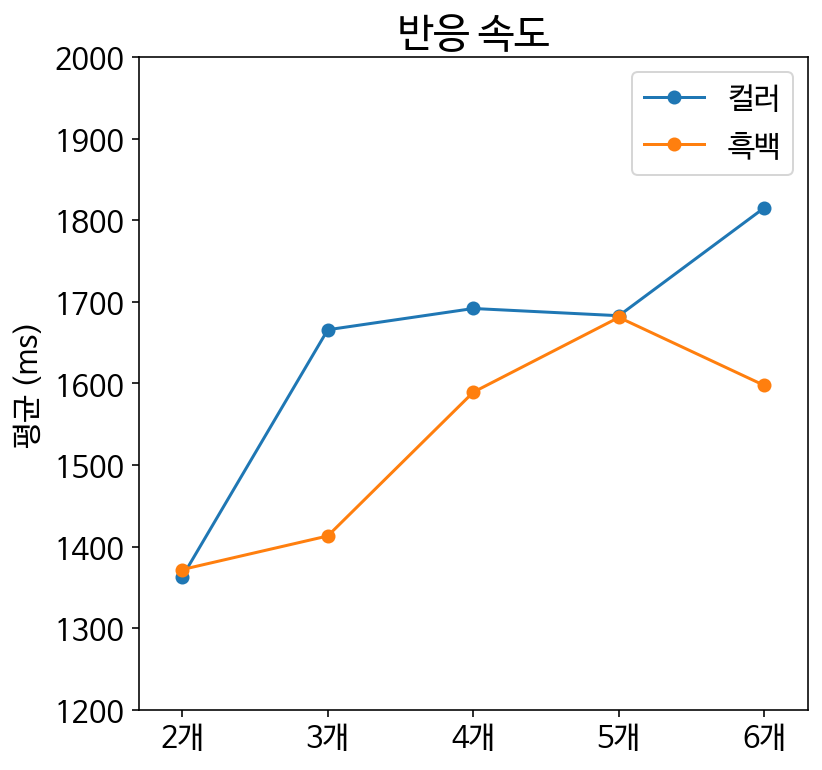

In [ ]:
plt.figure(figsize = (6, 6))
plt.rc('font', size = 15)   
plt.plot([1, 2, 3, 4, 5], [np.average(df_rt3.two_color), np.average(df_rt3.three_color), np.average(df_rt3.four_color), np.average(df_rt3.five_color), np.average(df_rt3.six_color)], marker = 'o', label = '컬러')
plt.plot([1, 2, 3, 4, 5], [np.average(df_rt3.two_black), np.average(df_rt3.three_black), np.average(df_rt3.four_black), np.average(df_rt3.five_black), np.average(df_rt3.six_black)], marker = 'o', label = '흑백')
plt.title("반응 속도", fontsize = 20)
plt.xlim(0.7, 5.3)
plt.ylim(1200, 2000)
plt.legend()
plt.xticks((1, 2, 3, 4, 5), ('2개', '3개', '4개', '5개', '6개'))
plt.ylabel('평균 (ms)')
plt.show()

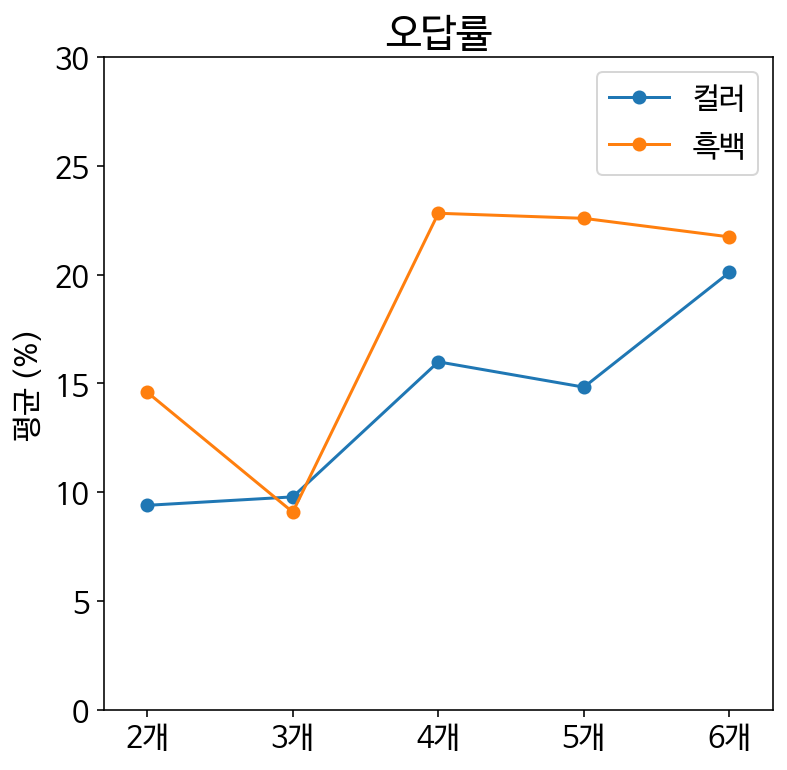

In [ ]:
plt.figure(figsize = (6, 6))
plt.rc('font', size = 15)   
plt.plot([1, 2, 3, 4, 5], [np.average(df_pe3.two_color), np.average(df_pe3.three_color), np.average(df_pe3.four_color), np.average(df_pe3.five_color), np.average(df_pe3.six_color)], marker = 'o', label = '컬러')
plt.plot([1, 2, 3, 4, 5], [np.average(df_pe3.two_black), np.average(df_pe3.three_black), np.average(df_pe3.four_black), np.average(df_pe3.five_black), np.average(df_pe3.six_black)], marker = 'o', label = '흑백')
plt.title("오답률", fontsize = 20)
plt.xlim(0.7, 5.3)
plt.ylim(0, 30)
plt.legend()
plt.xticks((1, 2, 3, 4, 5), ('2개', '3개', '4개', '5개', '6개'))
plt.ylabel('평균 (%)')
plt.show()